In [3]:
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('data.csv', encoding = 'utf-16', sep='\t' )

# Group A 
group_a = df.loc[df['AG08'] == 1]

# Group B
group_b = df.loc[df['AG08'] == 2]

# Transmitted data
correct = df.loc[[0],'A1_1':'A2_12']

# Fix missing font:

Install fonts included in the folder of this project

In [94]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

from matplotlib import rc
rc('font', **{'serif': ['cmunss']})
rc('text', usetex=True)

SMALL_SIZE = 14
X_TICK_SIZE = 16
MEDIUM_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=X_TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [102]:
def calcSingleAccuracy(a, correct):
    i = 0
    for column in a:
        if(a[column].values[0] == correct[column].values[0]):
            i += 1
    return i/a.size * 100


def calcAccuracyGroup(group, correct):
    result = []
    #Iterate over rows
    for index,row in group.iterrows():
        i = 0
        result.append(calcSingleAccuracy(group.loc[[index]], correct))
    return pd.Series(result)   

def autolabel(bot,top,barchart):
    height = []
    for i in range(len(bot)):
        height.append(bot[i] + top[i])
    i = 0
    for bar in barchart:
        ax.text(bar.get_x() + bar.get_width()/2, 1.05* height[i],'%d' % int(height[i]), ha='center', va='bottom')
        i += 1

def autolabel_single(accuracy,deviation,barchart):
    height = 30
    i=0
    for bar in barchart:
        #accuracy
        accuracy_str = '$\\mu$=' + str(round(accuracy[i],1)).replace('.', ',')
        deviation_str = '$\\sigma$=' + str(round(deviation[i],1)).replace('.', ',')
        ax.text(bar.get_x() + bar.get_width()/2, height,accuracy_str, ha='center', va='bottom',fontsize=12)
        ax.text(bar.get_x() + bar.get_width()/2, height - 8,deviation_str, ha='center', va='bottom',fontsize=12)
        i += 1
### Recognition Rate Group A
group_a_task_one = calcAccuracyGroup(group_a.loc[:,'A1_1':'A1_12'],correct.loc[[0],'A1_1':'A1_12'])
group_a_task_two = calcAccuracyGroup(group_a.loc[:,'A2_1':'A2_12'],correct.loc[[0],'A2_1':'A2_12'])
group_a_data_accuracy = calcAccuracyGroup(group_a.loc[:,'A1_1':'A2_12'],correct.loc[[0],'A1_1':'A2_12'])


### Recognition Rate Group B
group_b_task_one = calcAccuracyGroup(group_b.loc[:,'A1_1':'A1_12'],correct.loc[[0],'A1_1':'A1_12'])
group_b_task_two = calcAccuracyGroup(group_b.loc[:,'A2_1':'A2_12'],correct.loc[[0],'A2_1':'A2_12'])
group_b_data_accuracy= calcAccuracyGroup(group_b.loc[:,'A1_1':'A2_12'],correct.loc[[0],'A1_1':'A2_12'])

task_one = calcAccuracyGroup(df.loc[:,'A1_1':'A1_12'],correct.loc[[0],'A1_1':'A1_12']).loc[1:]
task_two = calcAccuracyGroup(df.loc[:,'A2_1':'A2_12'],correct.loc[[0],'A2_1':'A2_12']).loc[1:]

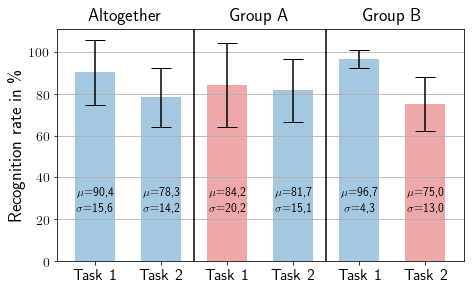

In [103]:
width = 0.6
colors = ['#1f77b4','#1f77b4' ,'#d62728' ,'#1f77b4' ,'#1f77b4' ,'#d62728'] #for dataset

x_label = ['Task 1','Task 2','Task 1', 'Task 2', 'Task 1', 'Task 2']
x_pos = np.arange(len(x_label))
accuracy = [task_one.mean(),task_two.mean(),group_a_task_one.mean(), group_a_task_two.mean(), group_b_task_one.mean(), group_b_task_two.mean() ]
deviation = [task_one.std(),task_two.std(),group_a_task_one.std(), group_a_task_two.std(), group_b_task_one.std(),group_b_task_two.std()]

fig, ax = plt.subplots()

bar_chart = ax.bar(x_pos, accuracy, yerr=deviation,color = colors, align='center', alpha = 0.4, ecolor='black', capsize=10, width = width)

#X Achse
ax.set_xticks(x_pos)
ax.set_xticklabels(x_label)

# Y Achse
ax.yaxis.grid(True)
ax.set_ylabel("Recognition rate in \%")
plt.yticks(np.arange(0, 101, step=20))

plt.tight_layout()

plt.axvline(x=1.5,color='k')
plt.axvline(x=3.5,color='k')
    
ax.text(-0.1, 115, r'Altogether', fontsize=MEDIUM_SIZE)
ax.text(2.05, 115, r'Group A', fontsize=MEDIUM_SIZE)
ax.text(4.05, 115, r'Group B', fontsize=MEDIUM_SIZE)

autolabel_single(accuracy,deviation,bar_chart)

fig.set_figwidth(7)
plt.savefig("Recognition_Rate.pdf", bbox_inches='tight')
plt.savefig("Recognition_Rate.png", bbox_inches='tight')

plt.show()

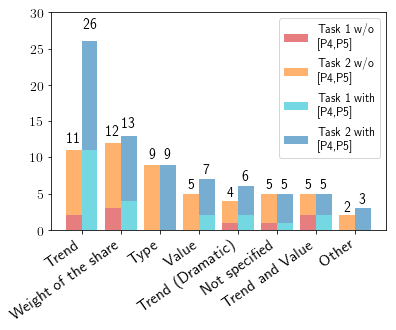

In [93]:
### Exact errors
fig, ax = plt.subplots()

# Change font size
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=12) 

x_label=['Trend',
         'Weight of the share',
         'Type',
         'Value',
         'Trend (Dramatic)',
         'Not specified',         
         'Trend and Value', 
         'Other']

task_one = [11,4,0,2,2,1,2,0]
task_two = [15,9,9,5,4,4,3,3]
bad_one = [2,3,0,0,1,1,2,0]
bad_two = [9,9,9,5,3,4,3,2]

width = 0.4

colors = ['#17becf','#1f77b4','#d62728','#ff7f0e']

index = np.arange(len(x_label))
ax.set_xticks(index-width/2)
plt.xticks(rotation=35, horizontalalignment="right")
ax.set_xticklabels(x_label)
all_bot = ax.bar(index, task_one,align='center', alpha=0.6, width=width,color=colors[0])
all_top = ax.bar(index, task_two,align='center', alpha=0.6, bottom=task_one, width=width, color=colors[1])
bad_bot = ax.bar(index - width, bad_one,align='center', alpha=0.6, width=width,color=colors[2])
bad_top = ax.bar(index - width, bad_two, bottom = bad_one, align='center', alpha=0.6, width=width,color=colors[3])

plt.yticks(np.arange(0, 35, step=5))
autolabel(task_one,task_two,all_bot)
autolabel(bad_one,bad_two,bad_bot)

ax.legend((bad_bot[0],bad_top[1],all_bot[0], all_top[1]), ('Task 1 w/o\n [P4,P5]', 'Task 2 w/o\n [P4,P5]', 'Task 1 with\n [P4,P5]', 'Task 2 with\n [P4,P5]'))
plt.savefig("Misinterpretation_Details.pdf", bbox_inches='tight')
plt.show()